<a href="https://colab.research.google.com/github/Dhanush-Karthik16/Image-Classification_on_CIFAR_10_Using_Convolutional_Neural_Networks/blob/main/Image_Classification_on_CIFAR_10_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,datasets

In [ ]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
xtest.shape

(10000, 32, 32, 3)

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

'horse'

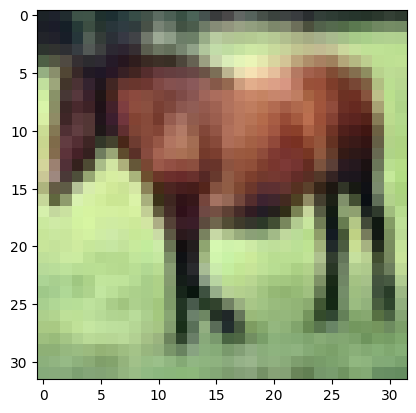

In [ ]:
plt.imshow(xtrain[7])
class_names[ytrain[7][0]]

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(xtrain,ytrain,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 41ms/step - accuracy: 0.1064 - loss: 2.3676 - val_accuracy: 0.1030 - val_loss: 2.3026
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.1030 - val_loss: 2.3026
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.1011 - loss: 2.3026 - val_accuracy: 0.1026 - val_loss: 2.3026
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.1025 - loss: 5.2046 - val_accuracy: 0.1064 - val_loss: 8.3841
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.0997 - loss: 8.2046 - val_accuracy: 0.1064 - val_loss: 8.3841
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.0997 - loss: 8.1943 - val_accuracy: 0.1064 - val_loss: 8.3841
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.1008 - loss: 8.2104 - val_accuracy: 0.1064 - val_loss: 8.3841
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.0987 -

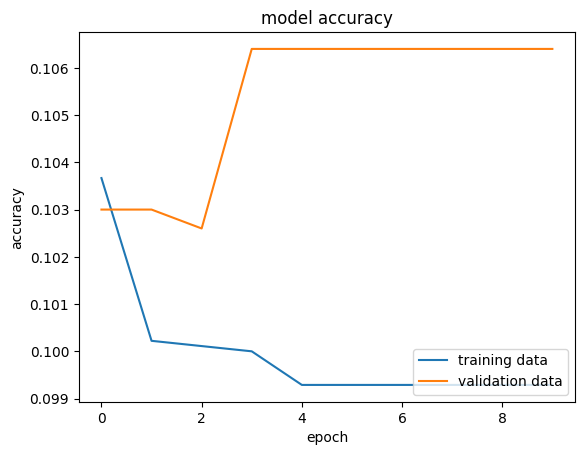

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

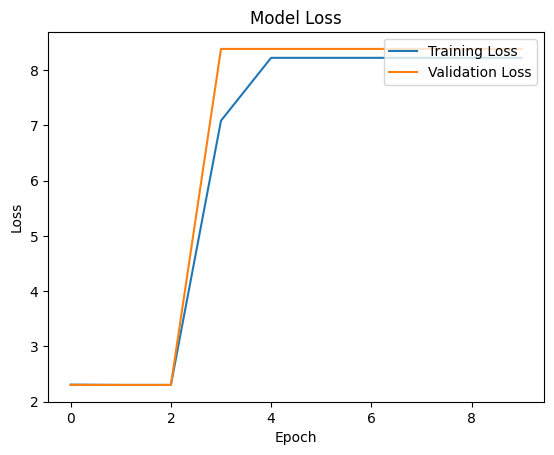

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


In [ ]:
ypred=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
import numpy as np
ypred1=np.argmax(ypred,axis=1)
ypred1[2004]

np.int64(8)

In [ ]:
ypred1[2004]

np.int64(8)

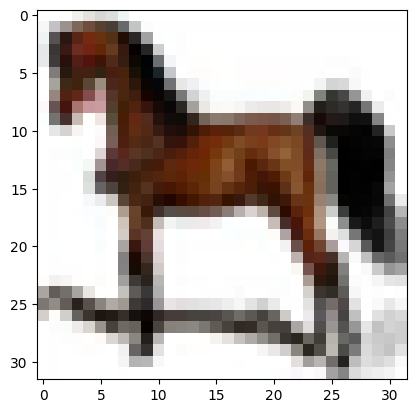

In [ ]:
plt.imshow(xtest[2004])

Text(0.5, 1.0, 'ytest: [8], ypred: 8')

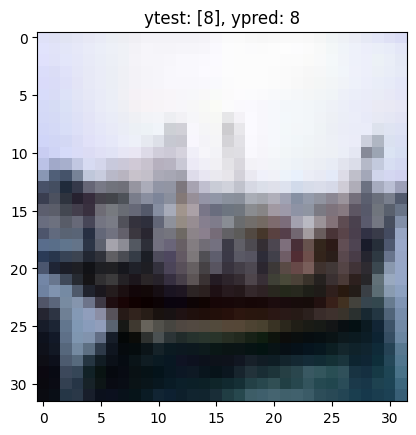

In [ ]:
plt.imshow(xtest[18],cmap='gray')
plt.title(f"ytest: {ytest[18]}, ypred: {ypred1[18]}")